In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from struct import pack, unpack

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [2]:
def compute_lcs_volume(p, ssb):
    normal = ssb @ p
    vertices_lcs = list(np.where(normal < 0)[0])
    normal_short = normal[vertices_lcs]
    with np.errstate(divide='ignore'):
        factors = normal_short[:, None]/(normal_short[:, None] - normal[None, :])
        factors = np.nan_to_num(factors, copy=False, nan=1.0, posinf=1.0, neginf=1.0)
    summands = np.prod(factors, axis=1)
    np.sum(summands)

In [3]:
def compute_lcs_volume_vectorized(p_matr, ssb):
    normal = - p_matr @ ssb
    normal_short = np.where(normal < 0, normal, 0)
    with np.errstate(divide='ignore'):
        factors = normal_short[:, :, None] / (normal_short[:, :, None] - normal[:, None, :])
        factors = np.nan_to_num(factors, copy=False, nan=1.0, posinf=1.0, neginf=1.0)
    summands = np.prod(factors, axis=2)
    return np.sum(summands, axis=1)

In [4]:
def initialize_symmetric_tournament(m):
    if m % 2 != 1:
        raise ValueError("The value of m is even, please choose an odd value.")
    ssb = np.zeros((m, m))
    for k in range(1, int((m+1)/2)):
        for i in range(m):
            ssb[i, (i+k)%m] = 1
            ssb[i, (i-k)%m] = -1
    return ssb

# Generating samples and storing them

In [5]:
num_samples = 1000000

for i in range(1, 11):
    m = 2*i + 1
    rng = np.random.default_rng(2025 + m)

    ssb = initialize_symmetric_tournament(m)
    alpha = np.ones(m)

    p_matr = rng.dirichlet(alpha, num_samples)
    samples = compute_lcs_volume_vectorized(p_matr, ssb)

    with open(DATA_DIR / 'intr_{:03d}.dat'.format(m), 'wb') as file:
        file.write(pack('d' * len(samples) , *samples))

In [5]:
num_samples = 500000
m = 31
rng = np.random.default_rng(2025 + m)

ssb = initialize_symmetric_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / 'intr_{:03d}.dat'.format(m), 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / 'intr_{:03d}.dat'.format(m), 'ab') as file:
    file.write(pack('d' * len(samples) , *samples))

In [6]:
num_samples = 250000
m = 41
rng = np.random.default_rng(2025 + m)

ssb = initialize_symmetric_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / 'intr_{:03d}.dat'.format(m), 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))

for _ in range(3):
    p_matr = rng.dirichlet(alpha, num_samples)
    samples = compute_lcs_volume_vectorized(p_matr, ssb)

    with open(DATA_DIR / 'intr_{:03d}.dat'.format(m), 'ab') as file:
        file.write(pack('d' * len(samples) , *samples))

In [ ]:
with open(DATA_DIR / 'store.dat', 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))


# Reading the file:
# with open(DATA_DIR / 'store.dat', 'rb') as file:
#     packed = file.read()
#     tuple = unpack('d' * (len(packed) // 8), packed) # 8 bytes per double

# Plotting

In [5]:
with open(DATA_DIR / 'intr_003.dat', 'rb') as file:
    packed = file.read()
    samples = unpack('d' * (len(packed) // 8), packed) # 8 bytes per double

df_samples = pd.DataFrame(samples, columns=['03'])

for i in (list(range(5, 23, 2)) + [31, 41]):
    with open(DATA_DIR / f'intr_{i:03d}.dat', 'rb') as file:
        packed = file.read()
        samples = unpack('d' * (len(packed) // 8), packed)
        df_samples[f'{i:02d}'] = samples

df_samples

,03,05,07,09,11,13,15,17,19,21,31,41
0,0.553356,0.502086,0.489847,0.494552,0.488792,0.500668,0.493739,0.499548,0.500638,0.500012,0.497492,0.500479
1,0.457639,0.494599,0.500561,0.526986,0.494882,0.499116,0.485373,0.500208,0.498882,0.500221,0.501291,0.500031
2,0.451348,0.488971,0.499685,0.493629,0.490268,0.502572,0.499217,0.484807,0.494716,0.499421,0.500224,0.500088
3,0.494462,0.509347,0.497418,0.486787,0.495201,0.496526,0.501959,0.495131,0.497822,0.499674,0.500030,0.499688
4,0.479838,0.521126,0.496120,0.496861,0.503215,0.496787,0.501090,0.500174,0.497429,0.506039,0.500236,0.499507
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.534299,0.485561,0.522689,0.502783,0.503753,0.490791,0.508747,0.499347,0.495625,0.499775,0.499149,0.497233
999996,0.444725,0.491148,0.495756,0.506505,0.492276,0.499314,0.497227,0.488373,0.500521,0.501065,0.502074,0.500088
999997,0.555528,0.506688,0.499774,0.489569,0.485023,0.498774,0.495735,0.501974,0.497906,0.500376,0.496350,0.500618
999998,0.537767,0.496823,0.494927,0.499635,0.503260,0.495631,0.499000,0.500468,0.500489,0.499654,0.499773,0.500513


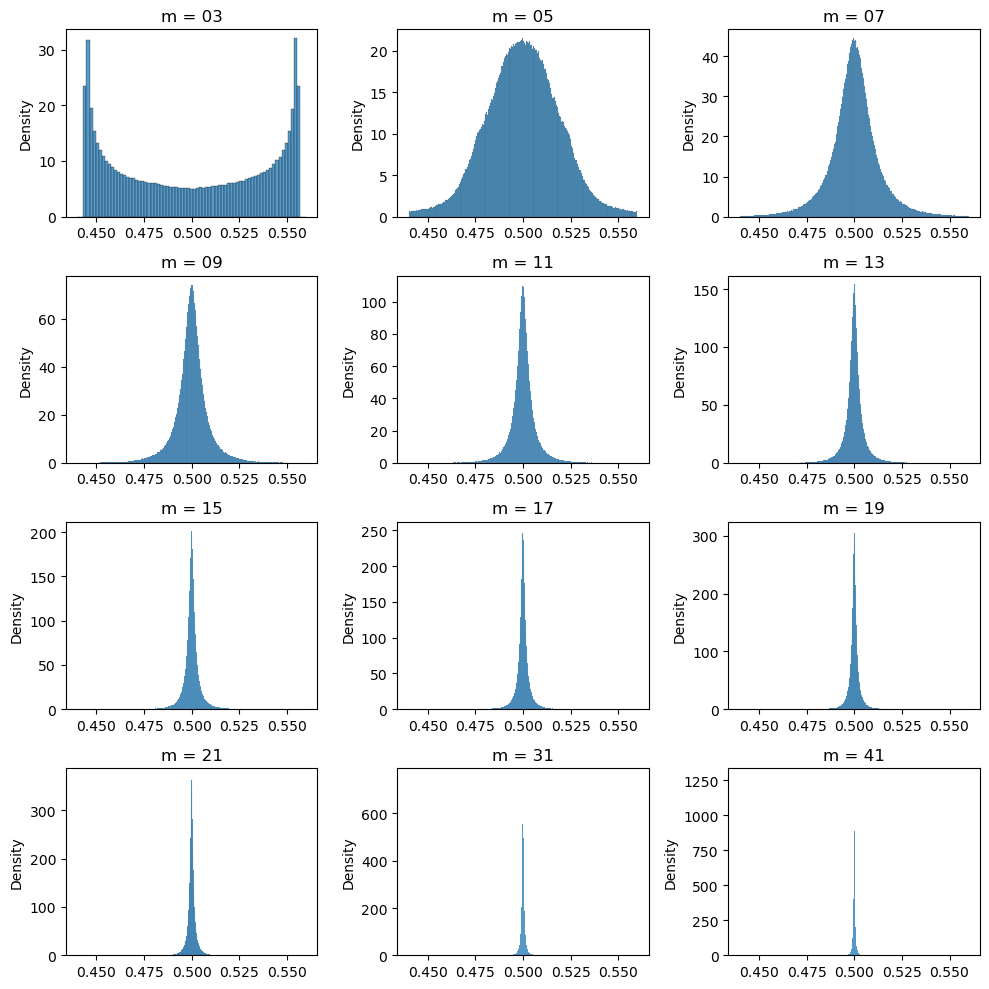

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
columns = [['03', '05', '07'], ['09', '11', '13'], ['15', '17', '19'], ['21', '31', '41']]
# columns = [['03', '05', None], [None, None, None], [None, None, None], [None,  None, None]]

for i in range(4):
    for j in range(3):
        col = columns[i][j]
        if col is not None:
            g = sns.histplot(df_samples[col], ax=ax[i,j], stat='density', binrange=(0.44, 0.56))
            g.axes.set_title("m = " + col)
            g.set_xlabel(None)

fig.tight_layout()

fig.savefig(FIG_DIR / "distr_intr_lcs.svg")
fig.savefig(FIG_DIR / "distr_intr_lcs.png", dpi=300)
fig.savefig(FIG_DIR / "distr_intr_lcs.pdf")

In [15]:
df_samples.describe().T

,count,mean,std,min,25%,50%,75%,max
03,1000000.0,0.500029,3.991877e-02,4.444444e-01,0.459515,0.500079,0.540489,5.555556e-01
05,1000000.0,0.499997,2.127398e-02,4.097187e-01,0.487184,0.499977,0.512830,5.903501e-01
07,1000000.0,0.500015,1.336953e-02,3.986979e-01,0.493482,0.500011,0.506539,5.973805e-01
09,1000000.0,0.499989,9.287040e-03,4.056506e-01,0.495942,0.499993,0.504046,5.937496e-01
11,1000000.0,0.499992,6.880279e-03,4.152450e-01,0.497204,0.499994,0.502790,5.746161e-01
13,1000000.0,0.500004,5.330388e-03,4.255242e-01,0.497953,0.500003,0.502053,5.628298e-01
15,1000000.0,0.499997,4.257813e-03,4.429957e-01,0.498409,0.499995,0.501580,5.523096e-01
17,1000000.0,0.500004,3.490950e-03,4.566510e-01,0.498736,0.500000,0.501266,5.557108e-01
19,1000000.0,0.500008,2.958036e-03,4.516571e-01,0.498966,0.500005,0.501044,9.687500e-01
21,1000000.0,0.500000,2.496784e-03,1.718750e-01,0.499131,0.499998,0.500864,5.355414e-01


In [20]:
df_samples.quantile([0.001, 0.01, 0.05, 0.95, 0.99, 0.999]).T

,0.001,0.010,0.050,0.950,0.990,0.999
03,0.444445,0.444470,0.445069,0.554928,0.555531,0.555555
05,0.417395,0.441830,0.467074,0.532915,0.558300,0.582617
07,0.439352,0.462010,0.478644,0.521373,0.538107,0.561179
09,0.454436,0.472594,0.485298,0.514638,0.527296,0.545509
11,0.464563,0.479215,0.489326,0.510676,0.520642,0.535269
13,0.471529,0.483746,0.491889,0.508118,0.516244,0.528751
15,0.476464,0.486978,0.493602,0.506405,0.513054,0.523940
17,0.480275,0.489264,0.494809,0.505216,0.510739,0.519858
19,0.483103,0.491075,0.495701,0.504340,0.509047,0.516769
21,0.485622,0.492431,0.496367,0.503630,0.507631,0.514681


In [26]:
print("Invalid samples for m = 21: ", df_samples['21'][(df_samples['21'] < 0) | (df_samples['21'] > 1)].count())
print("Invalid samples for m = 31: ", df_samples['31'][(df_samples['31'] < 0) | (df_samples['21'] > 1)].count())
print("Invalid samples for m = 41: ", df_samples['41'][(df_samples['41'] < 0) | (df_samples['41'] > 1)].count())

Invalid samples for m = 21:  0
Invalid samples for m = 31:  51
Invalid samples for m = 41:  3995
